# STEP 1: Convert class into Integer  
- a) Verified_reviews  
- b) Variety of products  

# STEP 2: Check Numerical Inputs  

- ratings  
- feedback  

# STEP 3: Drop the date & time from dataset  

# STEP 4: Perform NLP on object type to convert into type integer  

# STEP 5: Create a model to predict the review of the particular product (True or False)  

# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# The data is stored in tab-separated values (TSV) format. The .tsv extension indicates that each value in the file is separated by a tab, and sep='\t' ensures pandas correctly parses the file using tabs as the delimiter.
data = pd.read_csv('data/amazon_alexa.tsv',sep='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# PERFORMING EDA ON THE DATASET

In [ ]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [ ]:
data.shape

(3150, 5)

In [ ]:
for i in data.columns:
    print("Number of unique values in:", i, "is =", data[i].nunique())

Number of unique values in: rating is = 5
Number of unique values in: date is = 77
Number of unique values in: variation is = 16
Number of unique values in: verified_reviews is = 2300
Number of unique values in: feedback is = 2


In [ ]:
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,0
feedback,0


In [ ]:
data.describe()

,rating,feedback
count,3149.000000,3149.000000
mean,4.463957,0.918704
std,1.067773,0.273332
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 147.6+ KB


In [ ]:
data = data.drop('date',axis=1)

In [ ]:
data.head(2)

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1


In [ ]:
data.variation.value_counts()

,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['variation'] = le.fit_transform(data.variation)

In [ ]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1
3,5,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,5,Music,1


<Axes: xlabel='rating', ylabel='count'>

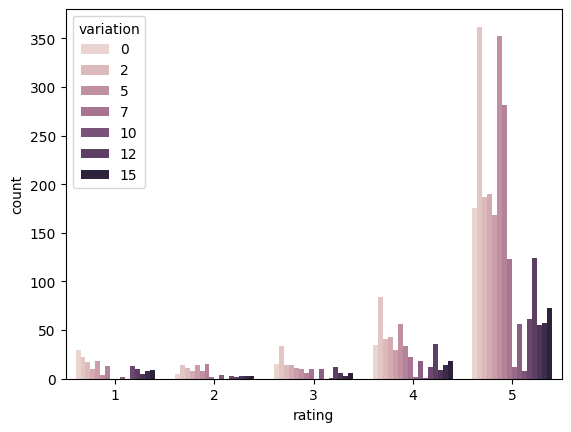

In [ ]:
sns.countplot(x='rating',hue=data.variation,data=data)

<Axes: xlabel='rating', ylabel='count'>

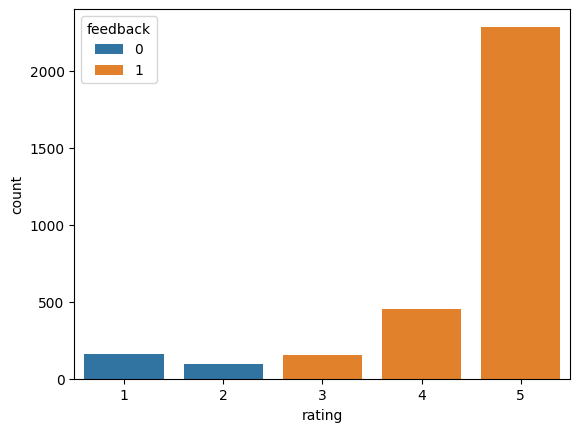

In [ ]:
sns.countplot(x='rating',hue='feedback',data=data)

<Axes: xlabel='variation', ylabel='count'>

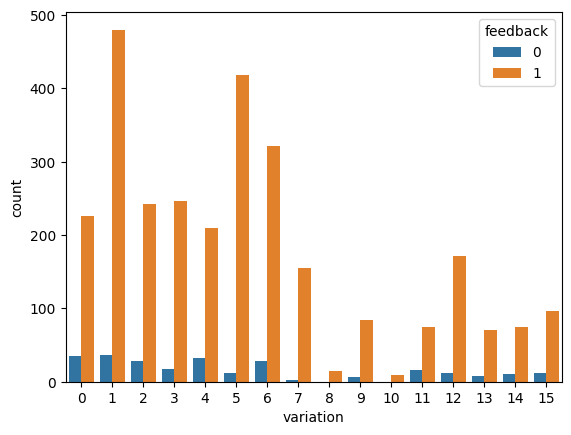

In [ ]:
sns.countplot(x='variation',hue='feedback',data=data)

In [ ]:
total_feedback = len(data.feedback)
positive = []
negative = []
for i in data.feedback:
  if  i == 1:
    positive.append(data.feedback[1])
  else:
    negative.append(data.feedback[0])
print('Postive:',len(positive)),print('Negative',len(negative))
percentage_of_positive = round((len(positive)/total_feedback)*100)
percentage_of_negative = round((len(negative)/total_feedback)*100)
print('% of positive comment is: ', percentage_of_positive,"%")
print('% of negative comment is: ', percentage_of_negative,"%")

Postive: 2893
Negative 256
% of positive comment is:  92 %
% of negative comment is:  8 %


In [ ]:
count_class_0 = df_class_0.shape[0]
count_class_1 = df_class_1.shape[0]

print(f"Count of class 0: {count_class_0}")
print(f"Count of class 1: {count_class_1}")


Count of class 0: 256
Count of class 1: 2893


Random over-sampling:
feedback
0    2893
1    2893
Name: count, dtype: int64


<Axes: title={'center': 'Count (feedback) - Over-sampling'}, xlabel='feedback'>

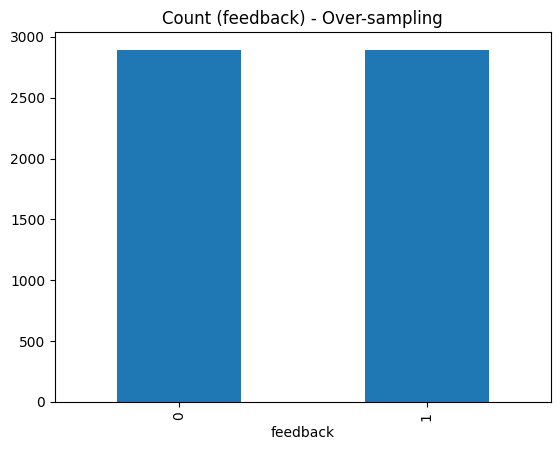

In [ ]:
# Over-sampling: Increase class 0 to the size of class 1
df_class_0 = data[data['feedback'] == 0]
df_class_1 = data[data['feedback'] == 1]
df_class_0_over = df_class_0.sample(len(df_class_1), replace=True, random_state=42)
df_sampled = pd.concat([df_class_0_over, df_class_1], axis=0)

# Print and plot
print('Random over-sampling:')
print(df_sampled.feedback.value_counts())
df_sampled.feedback.value_counts().plot(kind='bar', title='Count (feedback) - Over-sampling')


# PREDICTING THE FEEDDBACK

In [ ]:
X = data['verified_reviews']
y = data.feedback

In [ ]:
X[0] # positive 1

'Love my Echo!'

# PERFORM NLP

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer


1. Tokenizer(15212, lower=True, oov_token='UNK'):
This initializes the Tokenizer object with the following arguments:

15212: The num_words parameter. This specifies the maximum number of unique words to keep in the vocabulary. In this case, it will keep the 15,212 most frequent words across the dataset. All other words will be discarded.

lower=True: Converts all text to lowercase before tokenization. This helps to treat Apple, apple, and APPLE as the same word, preventing duplication of tokens due to case differences.

oov_token='UNK': The oov_token (out-of-vocabulary token) is a special token that replaces words that are not in the vocabulary. In this case, any word not present in the top 15,212 most frequent words will be replaced by the token 'UNK'.

2.
Let's break down the code:

python
Copy code
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(15212, lower=True, oov_token='UNK')
tokenizer.fit_transform(X)
1. Tokenizer(15212, lower=True, oov_token='UNK'):
This initializes the Tokenizer object with the following arguments:

15212: The num_words parameter. This specifies the maximum number of unique words to keep in the vocabulary. In this case, it will keep the 15,212 most frequent words across the dataset. All other words will be discarded.

lower=True: Converts all text to lowercase before tokenization. This helps to treat Apple, apple, and APPLE as the same word, preventing duplication of tokens due to case differences.

oov_token='UNK': The oov_token (out-of-vocabulary token) is a special token that replaces words that are not in the vocabulary. In this case, any word not present in the top 15,212 most frequent words will be replaced by the token 'UNK'.

2. tokenizer.fit_transform(X):
This part combines two steps:

fit_on_texts(X): This step analyzes the dataset X (which is expected to be a list of sentences or text documents) and creates a word index based on the frequency of words. It essentially builds the vocabulary and assigns an integer index to each word.

texts_to_sequences(X): After building the vocabulary, this step converts the input X into sequences of integers, where each integer represents a word in the text, based on the word index created in the previous step.

Random over-sampling:
feedback
0    2893
1    2893
Name: count, dtype: int64
Before SMOTE: (4050, 80) (4050,)
After SMOTETomek: (4080, 80) (4080,)
Confusion Matrix:
[[883   0]
 [ 34 819]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       883
           1       1.00      0.96      0.98       853

    accuracy                           0.98      1736
   macro avg       0.98      0.98      0.98      1736
weighted avg       0.98      0.98      0.98      1736


Accuracy Score:
0.9804147465437788


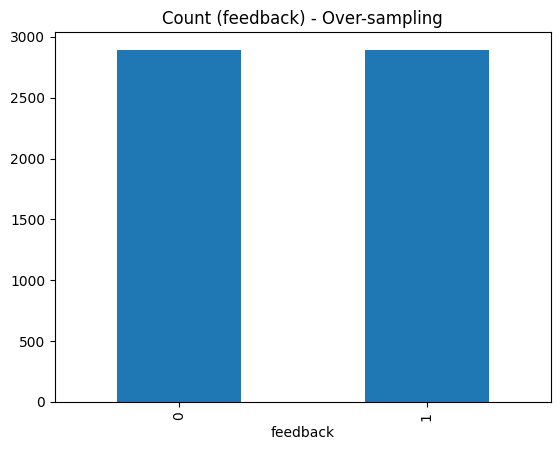

In [ ]:
# Over-sampling: Increase class 0 to the size of class 1
df_class_0 = data[data['feedback'] == 0]
df_class_1 = data[data['feedback'] == 1]
df_class_0_over = df_class_0.sample(len(df_class_1), replace=True, random_state=42)
df_sampled = pd.concat([df_class_0_over, df_class_1], axis=0)

# Print and plot
print('Random over-sampling:')
print(df_sampled.feedback.value_counts())
df_sampled.feedback.value_counts().plot(kind='bar', title='Count (feedback) - Over-sampling')

# Step 1: Tokenize the text data
X = df_sampled['verified_reviews']  # Input feature
y = df_sampled['feedback']  # Target variable

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer and tokenize the text
tokenizer = Tokenizer(num_words=15212, lower=True, oov_token='UNK')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad the sequences
X_pad = pad_sequences(X, maxlen=80, padding='post')

# Step 2: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.3, random_state=42)

# Step 3: Apply SMOTE to the training data
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Step 4: Check the shape of the resampled data
print("Before SMOTE:", X_train.shape, y_train.shape)
print("After SMOTETomek:", X_resampled.shape, y_resampled.shape)

# Step 5: Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the RandomForestClassifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 7: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


# Plotting the output

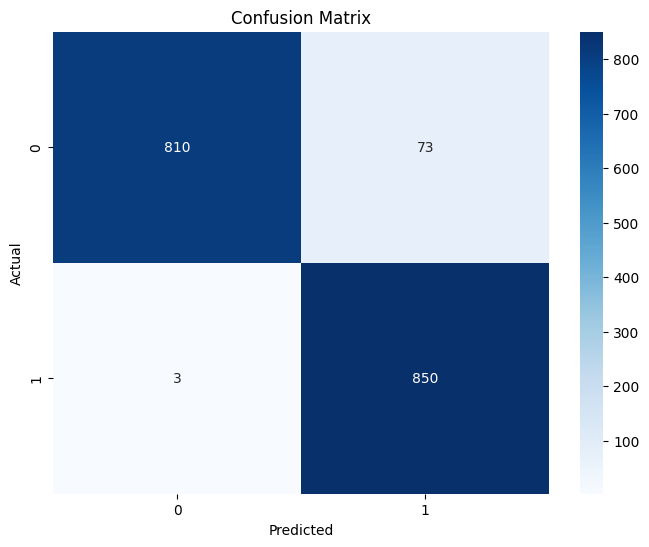

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


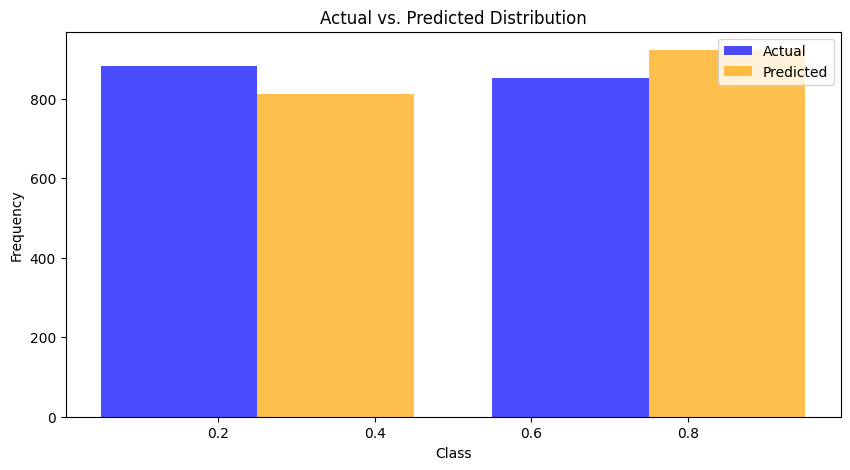

In [ ]:
# Actual vs. Predicted Distribution
plt.figure(figsize=(10, 5))
plt.hist([y_test, y_pred], bins=2, label=['Actual', 'Predicted'], color=['blue', 'orange'], alpha=0.7)
plt.title('Actual vs. Predicted Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.legend()
plt.show()

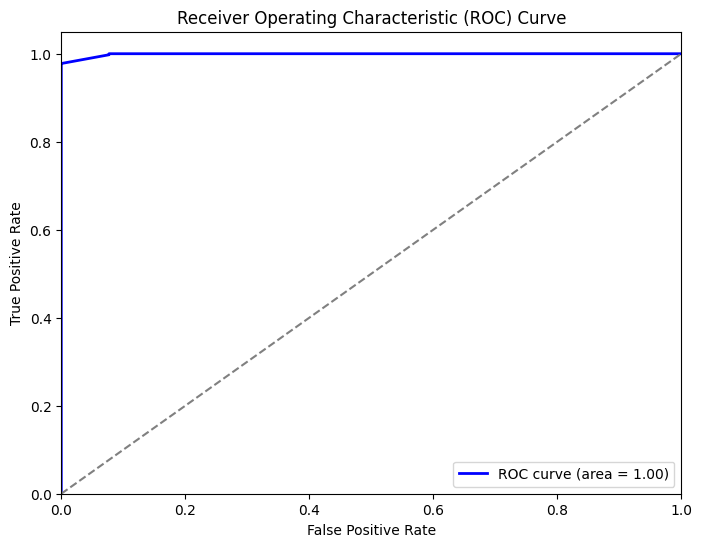

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

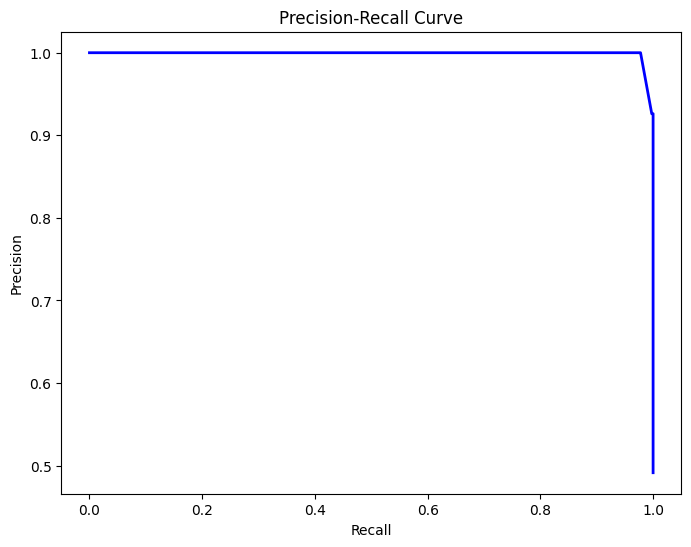

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
# Display the 'verified_reviews' column where 'feedback' is 0 from the balanced df_sampled DataFrame
verified_reviews_with_zero_feedback = df_sampled.loc[df_sampled['feedback'] == 0, 'verified_reviews']

# Add the 'negative_review' column to the original df_sampled DataFrame
df_sampled = df_sampled.copy()  # Create a copy to avoid modifying the original DataFrame in place
df_sampled['negative_review'] = df_sampled.apply(lambda row: row['verified_reviews'] if row['feedback'] == 0 else None, axis=1)
df_sampled.negative_review.head()

,negative_review
1313,Disconnects often
2098,Got this a few months ago with the idea that i...
1277,ALEXA IS NOT AS SMART AS SIRI! CANNOT CANCEL S...
373,I'm an Echo fan but this one did not work
1350,This thing woke me up in the middle of the nig...


In [ ]:
def review(feedback):
    # Ensure the input is a string
    if not isinstance(feedback, str):
        raise ValueError("Feedback must be a string.")

    # Prepare the sentence
    sentence = [feedback]  # Wrap feedback in a list

    # Tokenize and pad the sentence
    sentence_seq = tokenizer.texts_to_sequences(sentence)
    sentence_padded = pad_sequences(sentence_seq, maxlen=80, padding='post')

    # Predict using the model
    result = rf_classifier.predict(sentence_padded)

    # Print raw prediction result for debugging
    print("Raw prediction result:", result)

    # Determine if feedback is positive or negative
    if result[0] > 1:  # Adjust threshold based on your model
        print('Positive Feedback')
    else:
        print('Negative Feedback')

# Use the function to get feedback from the user
user_feedback = input("Enter a review: ")
review(user_feedback)


Enter a review: Disconnects often
Raw prediction result: [0]
Negative Feedback
